In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("..\data\defects_data.csv")
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [41]:
valores_unicos_columnas = {col: df[col].nunique() for col in df.columns}
valores_unicos_columnas

{'defect_id': 1000,
 'product_id': 100,
 'defect_type': 3,
 'defect_date': 182,
 'defect_location': 3,
 'severity': 3,
 'inspection_method': 3,
 'repair_cost': 996}

In [42]:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
defect_id,1000,100.0,int64,Numerica Continua
product_id,100,10.0,int64,Numerica Discreta
defect_type,3,0.3,object,Categorica
defect_date,182,18.2,object,Numerica Discreta
defect_location,3,0.3,object,Categorica
severity,3,0.3,object,Categorica
inspection_method,3,0.3,object,Categorica
repair_cost,996,99.6,float64,Numerica Continua


|**Columna/Variable**|**Descripción**|**Tipo_de_Variable**|**Importancia inicial**|**Nota**|
|----------------------|-------------------------------------------|--|--|----------------|
| `defect_id`         | Identificador único de cada defecto           |Indice único | - | no siginifcativo |
| `product_id`        | Identificador del producto                    |Numerica Discreta| 2| no está en el objetivo de este analisis, pero haremos un analisis para saber si hay allguna desviación|
| `defect_type`       | Tipo de defecto                               |Categorica | 1| importante para ver que tipo de defecto es más común y más costoso para poner remedio |
| `defect_date`       | Fecha en la que se detectó el defecto         |Fecha | 3 |  No relevante, aunque haremo un pequeño analisis    |
| `defect_location`   | Ubicación  donde se detectó el defecto  |Categorica |3 | No está en el objetivo |
| `severity`          | Nivel de gravedad                             |Categorica | 0| importante para comparar la gravedad |
| `inspection_method` | Método utilizado para detectar el defecto     |Categorica | 2| haremos un analisis superficial y dependiendo de los datos qui´z necesitamos profundizar más|
| `repair_cost`       | Coste de reparación del defecto               |Numerica continua |0|   relación directa para saber el coste de las reparaciones|


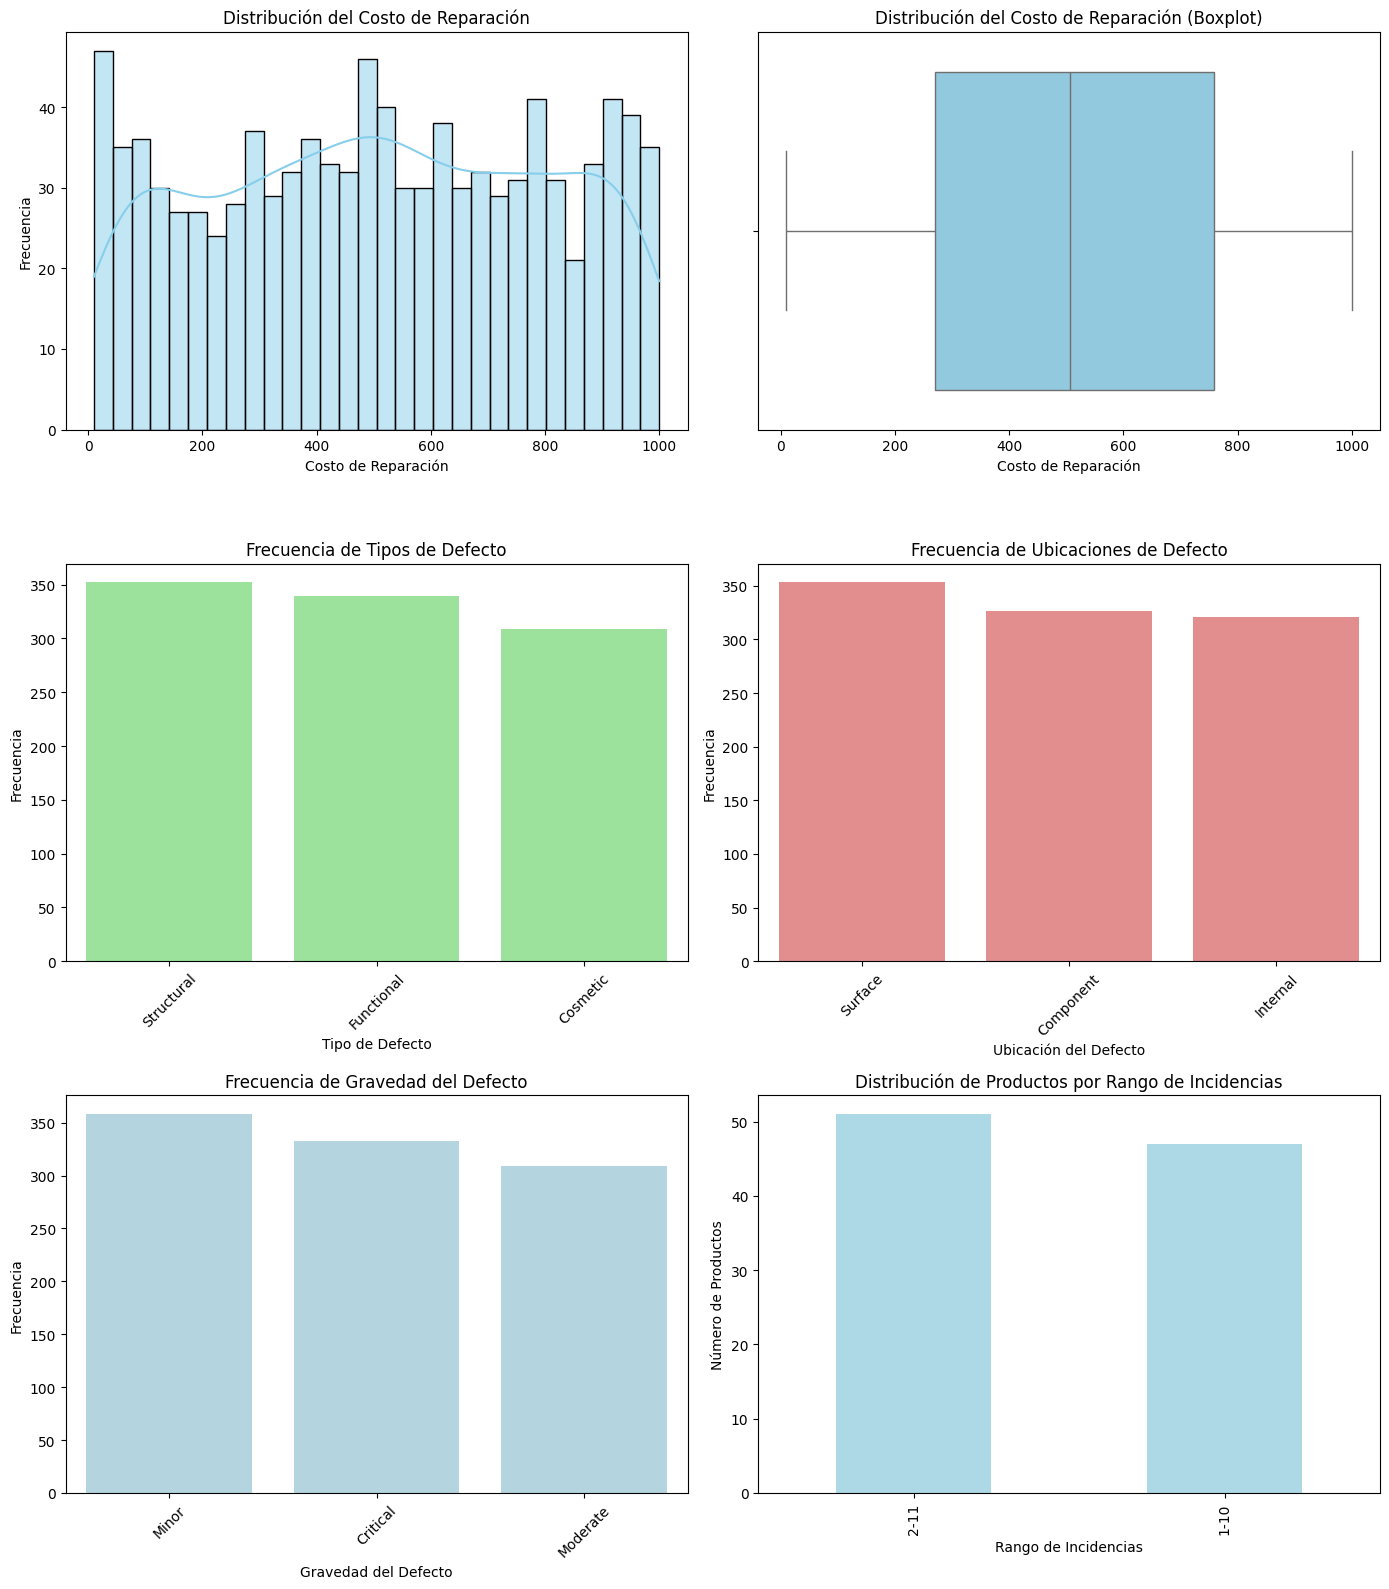

range(0, 30, 10)

In [ ]:

# Crear un subplot de 4 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# Análisis de la variable numérica 'repair_cost'
# Histograma de 'repair_cost'
sns.histplot(df['repair_cost'], kde=True, color='skyblue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribución del Costo de Reparación')
axes[0, 0].set_xlabel('Costo de Reparación')
axes[0, 0].set_ylabel('Frecuencia')

# Boxplot de 'repair_cost'
sns.boxplot(x=df['repair_cost'], color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Distribución del Costo de Reparación (Boxplot)')
axes[0, 1].set_xlabel('Costo de Reparación')

# Análisis de las variables categóricas
# Frecuencia de 'defect_type'
defect_type_count = df['defect_type'].value_counts()

# Gráfico de barras de 'defect_type'
sns.barplot(x=defect_type_count.index, y=defect_type_count.values, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Frecuencia de Tipos de Defecto')
axes[1, 0].set_xlabel('Tipo de Defecto')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45)

# Frecuencia de 'defect_location'
defect_location_count = df['defect_location'].value_counts()

# Gráfico de barras de 'defect_location'
sns.barplot(x=defect_location_count.index, y=defect_location_count.values, color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Frecuencia de Ubicaciones de Defecto')
axes[1, 1].set_xlabel('Ubicación del Defecto')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45)

# Frecuencia de 'severity'
severity_count = df['severity'].value_counts()

# Gráfico de barras de 'severity'
sns.barplot(x=severity_count.index, y=severity_count.values, color='lightblue', ax=axes[2, 0])
axes[2, 0].set_title('Frecuencia de Gravedad del Defecto')
axes[2, 0].set_xlabel('Gravedad del Defecto')
axes[2, 0].set_ylabel('Frecuencia')
axes[2, 0].tick_params(axis='x', rotation=45)






# Contamos las incidencias por producto
product_incidents_count = df['product_id'].value_counts()

# Crear rangos de incidencias de 10 en 10
bins = range(0, product_incidents_count.max() + 10, 10)  # Rango de 0 a max con un paso de 10
labels = [f'{x+1}-{x+10}' for x in range(0, len(bins)-1)]  # Etiquetas de los rangos

# Asignar cada producto al rango de incidencias correspondiente
product_incidents_count_binned = pd.cut(product_incidents_count, bins=bins, labels=labels, right=False)

# Contar cuántos productos hay en cada rango de incidencias y graficarlo
product_incidents_count_binned.value_counts().plot(kind='bar', color='lightblue')

# Añadir título y etiquetas al gráfico
axes[2, 1].set_title('Distribución de Productos por Rango de Incidencias')
axes[2, 1].set_xlabel('Rango de Incidencias')
axes[2, 1].set_ylabel('Número de Productos')

# Mostrar el gráfico
plt.tight_layout()  # Asegura que no se solapen las etiquetas
plt.show()
bins



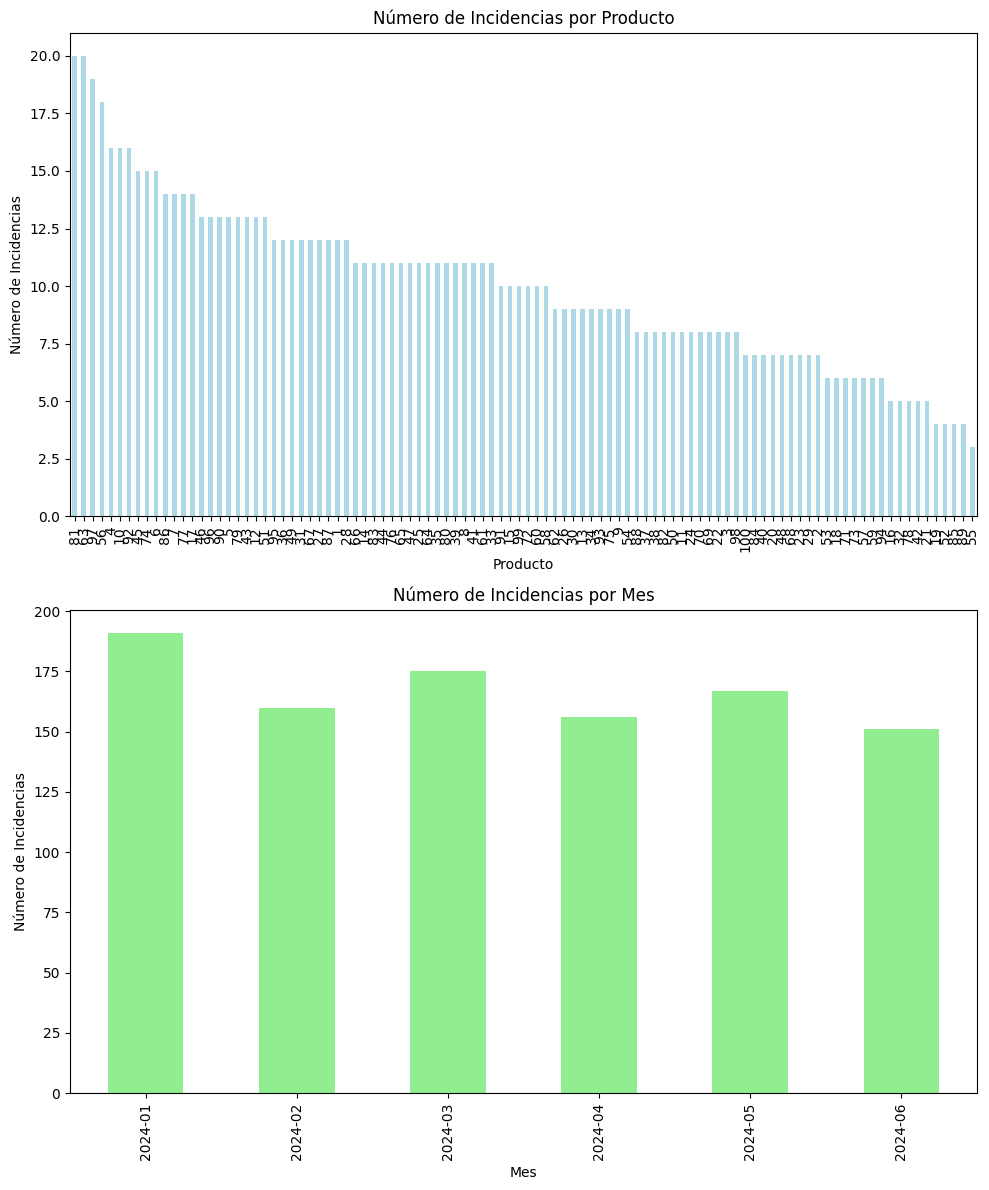

In [ ]:


# Contamos las incidencias por producto
product_incidents_count = df['product_id'].value_counts()

# Contamos las incidencias por mes (extraemos el mes de 'defect_date')
df['month'] = df['defect_date'].dt.to_period('M')
monthly_incidents = df['month'].value_counts().sort_index()

# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primer gráfico: número de incidencias por producto
product_incidents_count.plot(kind='bar', color='lightblue', ax=axes[0])
axes[0].set_title('Número de Incidencias por Producto')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Número de Incidencias')

# Segundo gráfico: incidencias por mes
monthly_incidents.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Número de Incidencias por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Número de Incidencias')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [13]:
df.product_id.value_counts()

product_id
81    20
63    20
97    19
56    18
4     16
      ..
19     4
52     4
85     4
89     4
55     3
Name: count, Length: 100, dtype: int64

  defect_type defect_location  severity        mean   median         std   
0    Cosmetic       Component  Critical  505.355588  495.480  311.588714  \
1    Cosmetic       Component     Minor  647.380857  714.630  270.194190   
2    Cosmetic       Component  Moderate  592.017857  608.260  235.246544   
3    Cosmetic        Internal  Critical  416.232286  422.030  264.790964   
4    Cosmetic        Internal     Minor  493.353750  497.885  343.283777   

      max    min  
0  987.71  10.22  
1  970.37  19.23  
2  967.29  97.53  
3  944.63  15.96  
4  967.35  18.42  


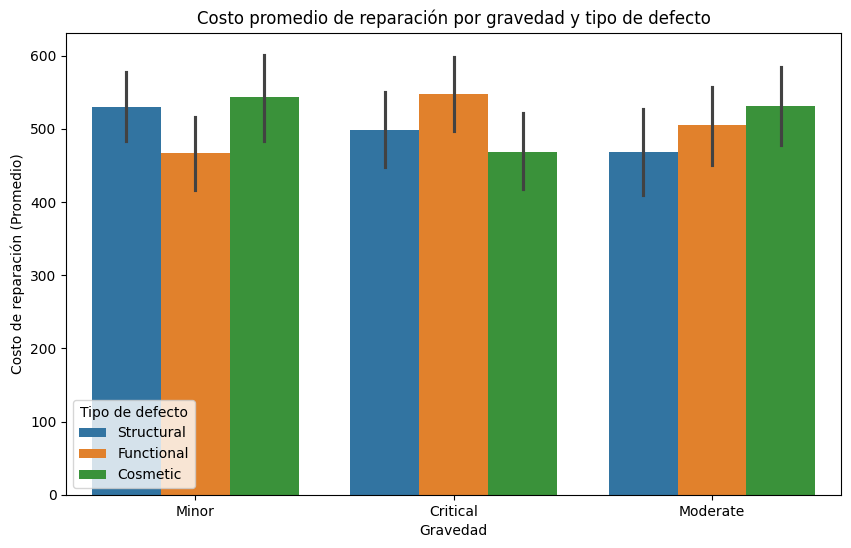

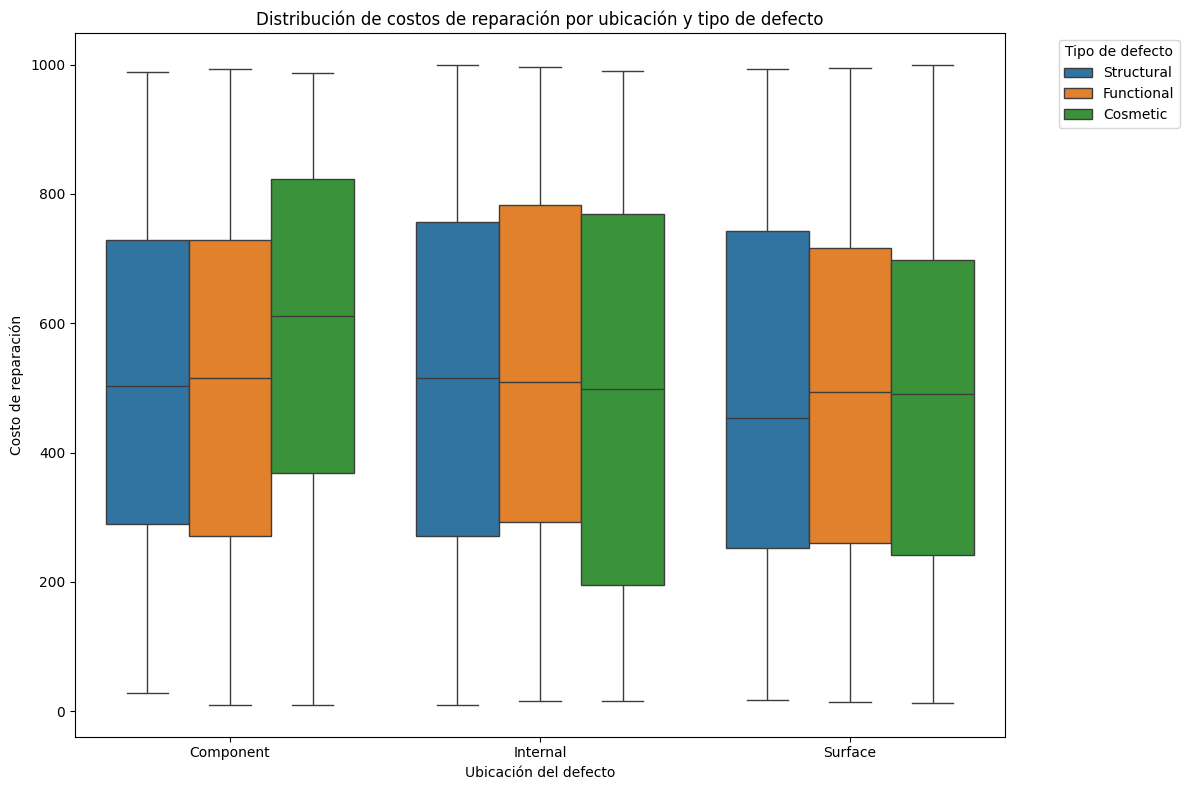

In [77]:
grouped = df.groupby(['defect_type', 'defect_location', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()

# Mostrar las primeras filas de la agrupación
print(grouped.head())

# Gráfico de barras: promedio de repair_cost por gravedad (severity)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='severity', y='repair_cost', hue='defect_type')
plt.title('Costo promedio de reparación por gravedad y tipo de defecto')
plt.ylabel('Costo de reparación (Promedio)')
plt.xlabel('Gravedad')
plt.legend(title='Tipo de defecto')
plt.show()

# Gráfico boxplot: análisis detallado por defect_type y defect_location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='defect_location', y='repair_cost', hue='defect_type')
plt.title('Distribución de costos de reparación por ubicación y tipo de defecto')
plt.ylabel('Costo de reparación')
plt.xlabel('Ubicación del defecto')
plt.legend(title='Tipo de defecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

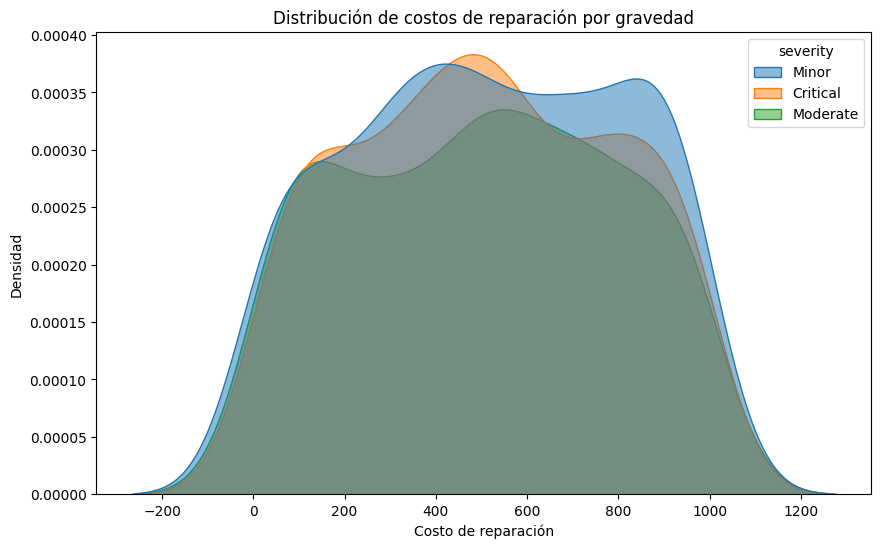

"\n# Histograma apilado para `repair_cost` según `defect_type`\nplt.figure(figsize=(10, 6))\nsns.histplot(data=df, x='repair_cost', hue='defect_type', bins=30, multiple='stack', alpha=0.7)\nplt.title('Distribución de costos de reparación por tipo de defecto')\nplt.xlabel('Costo de reparación')\nplt.ylabel('Frecuencia')\nplt.show()\n\n# Gráfico conjunto para `repair_cost` y `severity` (opcional)\nsns.jointplot(data=df, x='severity', y='repair_cost', kind='kde', hue='defect_type')\nplt.suptitle('Relación entre gravedad y costo de reparación')\nplt.tight_layout()\nplt.show()\n"

In [ ]:
# Gráfico de densidad para `repair_cost` según `severity`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='repair_cost', hue='severity', fill=True, alpha=0.5)
plt.title('Distribución de costos de reparación por gravedad')
plt.xlabel('Costo de reparación')
plt.ylabel('Densidad')
plt.show()
"""
# Histograma apilado para `repair_cost` según `defect_type`
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='repair_cost', hue='defect_type', bins=30, multiple='stack', alpha=0.7)
plt.title('Distribución de costos de reparación por tipo de defecto')
plt.xlabel('Costo de reparación')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico conjunto para `repair_cost` y `severity` (opcional)
sns.jointplot(data=df, x='severity', y='repair_cost', kind='kde', hue='defect_type')
plt.suptitle('Relación entre gravedad y costo de reparación')
plt.tight_layout()
plt.show()
"""

In [85]:
total_cost = df['repair_cost'].sum()


# Calcular los porcentajes para cada categoría
cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
cost_by_severity = df.groupby('severity')['repair_cost'].sum()
cost_by_severity

severity
Critical    168455.25
Minor       184166.97
Moderate    155004.93
Name: repair_cost, dtype: float64

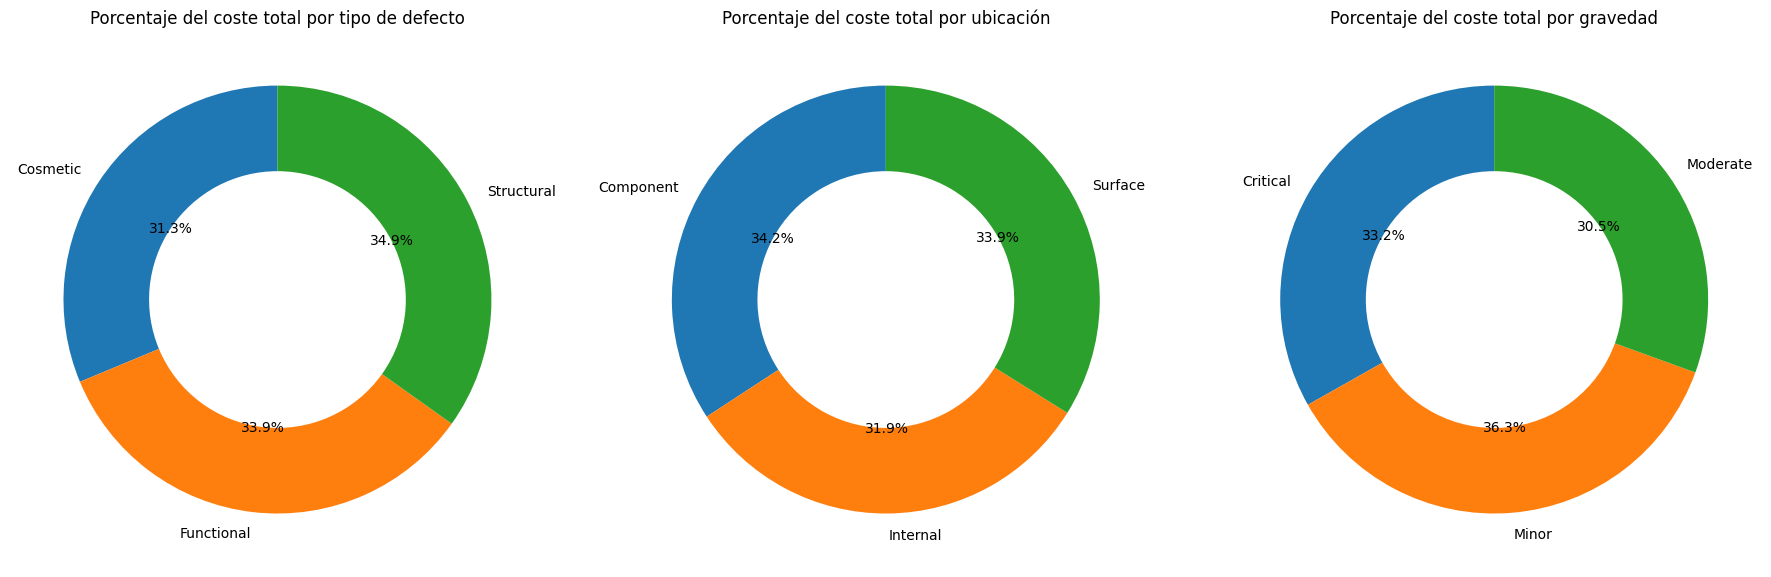

In [ ]:
total_cost = df['repair_cost'].sum()

# Calcular los porcentajes para cada categoría
cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
cost_by_severity = df.groupby('severity')['repair_cost'].sum()

# Crear un subplot con tres gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Función para crear gráficos de donut
def plot_donut(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    for autotext in autotexts:
        autotext.set_color('white')
    ax.set_title(title)

# Gráfico 1: Porcentaje sobre el coste total por tipo de defecto
plot_donut(axes[0], cost_by_defect_type, cost_by_defect_type.index, 'Porcentaje del coste total por tipo de defecto')

# Gráfico 2: Porcentaje sobre el coste total por ubicación del defecto
plot_donut(axes[1], cost_by_defect_location, cost_by_defect_location.index, 'Porcentaje del coste total por ubicación')

# Gráfico 3: Porcentaje sobre el coste total por gravedad del defecto
plot_donut(axes[2], cost_by_severity, cost_by_severity.index, 'Porcentaje del coste total por gravedad')

# Ajustar el diseño
plt.tight_layout()
plt.show()

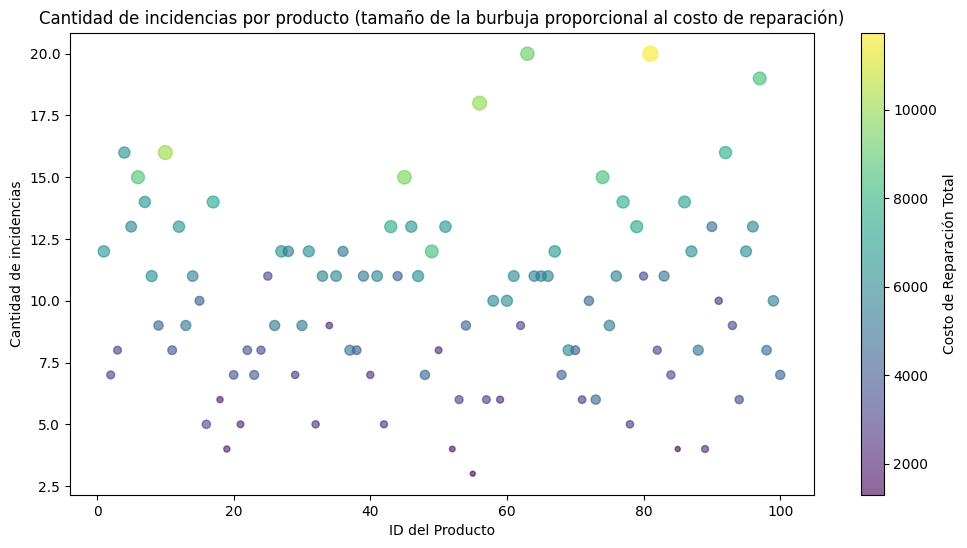

In [101]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calcular el costo total de reparación por producto
cost_by_product = df.groupby('product_id')['repair_cost'].sum()

# Contar las incidencias (reparaciones) por producto
incidences_by_product = df.groupby('product_id')['repair_cost'].count()

# Ordenar las incidencias de más a menos
incidences_by_product = incidences_by_product.sort_values(ascending=False)

# Obtener el costo de reparación correspondiente a cada producto (usaremos el costo total)
cost_by_product = cost_by_product.loc[incidences_by_product.index]

# Escalar el tamaño de las burbujas (multiplicamos por un factor para hacerlas visibles)
bubble_sizes = cost_by_product * 0.01  # Ajuste de escala para las burbujas

# Normalizar los valores de costo de reparación para la escala de colores
norm = plt.Normalize(cost_by_product.min(), cost_by_product.max())

# Crear la figura y los ejes (ax)
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de dispersión con tamaño de burbuja proporcional al costo de reparación
scatter = ax.scatter(incidences_by_product.index, incidences_by_product.values, 
                     s=bubble_sizes, c=cost_by_product, cmap='viridis', norm=norm, alpha=0.6)

# Añadir barra de color (colorbar) para mostrar la escala de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Costo de Reparación Total')

# Título y etiquetas
ax.set_title('Cantidad de incidencias por producto (tamaño de la burbuja proporcional al costo de reparación)')
ax.set_xlabel('ID del Producto')
ax.set_ylabel('Cantidad de incidencias')

# Mostrar el gráfico
plt.show()


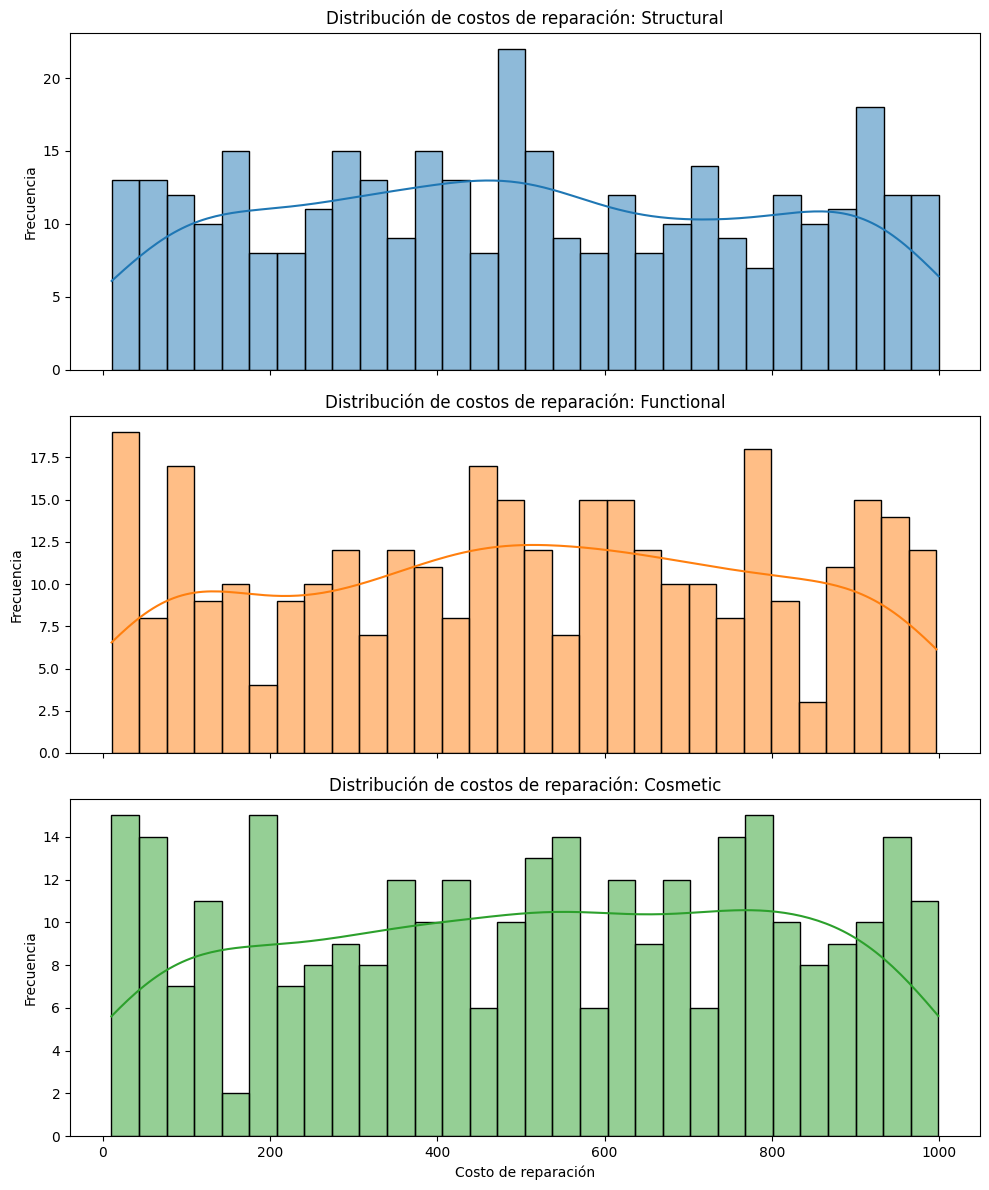

In [76]:


# Obtener las categorías únicas de defect_type
defect_types = df['defect_type'].unique()

# Configuración del tamaño del gráfico y cantidad de subplots
fig, axes = plt.subplots(nrows=len(defect_types), figsize=(10, len(defect_types) * 4), sharex=True)

# Crear un histograma por cada defect_type
for i, defect_type in enumerate(defect_types):
    subset = df[df['defect_type'] == defect_type]
    sns.histplot(data=subset, x='repair_cost', bins=30, kde=True, ax=axes[i], color=f"C{i}")
    axes[i].set_title(f'Distribución de costos de reparación: {defect_type}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel('Costo de reparación')

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [61]:
valores_unicos = {col: df[col].nunique() for col in df.columns}

In [27]:
valores_unicos.keys()

dict_keys(['defect_id', 'product_id', 'defect_type', 'defect_date', 'defect_location', 'severity', 'inspection_method', 'repair_cost'])

In [28]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [29]:
df
valores_unicos = {col: df[col].nunique() for col in df.columns}

In [30]:
valores_unicos

{'defect_id': 1000,
 'product_id': 100,
 'defect_type': 3,
 'defect_date': 182,
 'defect_location': 3,
 'severity': 3,
 'inspection_method': 3,
 'repair_cost': 996}

In [32]:
df.defect_location.value_counts()

defect_location
Surface      353
Component    326
Internal     321
Name: count, dtype: int64

In [33]:
df.defect_type.value_counts()

defect_type
Structural    352
Functional    339
Cosmetic      309
Name: count, dtype: int64

In [34]:
df.severity.value_counts()

severity
Minor       358
Critical    333
Moderate    309
Name: count, dtype: int64

In [45]:
product_ids=df['product_id']
repair_costs = df['repair_cost']

# Calcular la correlación de Pearson
correlation = np.corrcoef(product_ids, repair_costs)[0, 1]

print(f"Correlación de Pearson entre product_id y repair_cost: {correlation}")

Correlación de Pearson entre product_id y repair_cost: 0.004646850433432661


In [54]:


df_81=df[df["product_id"]==81]
df_81.describe()

,defect_id,product_id,repair_cost
count,20.000000,20.0,20.000000
mean,581.100000,81.0,587.032000
std,285.600733,0.0,227.984903
min,20.000000,81.0,93.130000
25%,394.250000,81.0,469.672500
50%,613.000000,81.0,595.880000
75%,783.500000,81.0,754.487500
max,967.000000,81.0,918.810000


<Axes: xlabel='product_id', ylabel='repair_cost'>

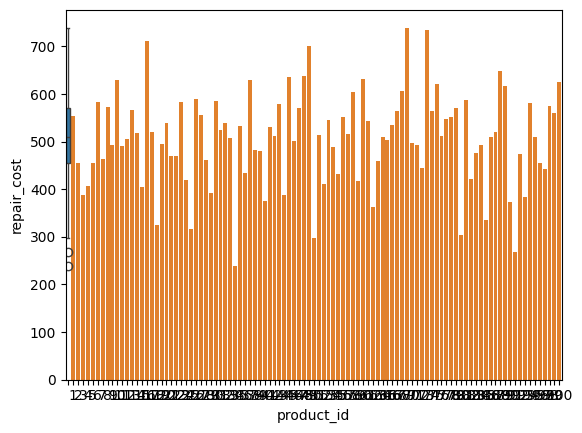

In [58]:
mean_repair_cost_by_product = df.groupby('product_id')['repair_cost'].mean()

# Mostrar el resultado
sns.boxplot(mean_repair_cost_by_product);
sns.barplot(mean_repair_cost_by_product)

In [47]:
df.product_id.value_counts()

product_id
81    20
63    20
97    19
56    18
4     16
      ..
19     4
52     4
85     4
89     4
55     3
Name: count, Length: 100, dtype: int64

In [49]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [16]:

df.defect_date.value_counts()

defect_date
2024-06-08    12
2024-03-23    12
2024-01-02    11
2024-01-09    11
2024-04-04    11
              ..
2024-06-28     1
2024-02-20     1
2024-04-25     1
2024-06-27     1
2024-05-09     1
Name: count, Length: 182, dtype: int64

In [23]:
def calculo_chi2(df, col1, col2):
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Calcular las frecuencias observadas (O)
    observed = contingency_table.values
    
    # Calcular las frecuencias esperadas (E)
    row_totals = contingency_table.sum(axis=1).values.reshape(-1, 1)
    col_totals = contingency_table.sum(axis=0).values
    total = contingency_table.sum().sum()
    
    # Frecuencias esperadas: (fila_total * columna_total) / total
    expected = (row_totals * col_totals) / total
    
    # Calcular Chi²
    chi2_stat = ((observed - expected) ** 2 / expected).sum()
    
    # Calcular grados de libertad
    dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    
    # Resultado
    return chi2_stat, observed, expected, dof



In [24]:
chi2_stat_1, observed_1, expected_1, dof_1 = calculo_chi2(df, 'defect_type', 'severity')
print("defect_type-severity")
print(f"Chi-cuadrado: {chi2_stat_1}")
print(f"Frecuencias observadas:\n{observed_1}")
print(f"Frecuencias esperadas:\n{expected_1}")
print(f"Grados de libertad: {dof_1}")
print("\n")

defect_type-severity
Chi-cuadrado: 3.5729995081236012
Frecuencias observadas:
[[107 106  96]
 [114 113 112]
 [112 139 101]]
Frecuencias esperadas:
[[102.897 110.622  95.481]
 [112.887 121.362 104.751]
 [117.216 126.016 108.768]]
Grados de libertad: 4




In [25]:
chi2_stat_2, observed_2, expected_2, dof_2 = calculo_chi2(df, 'defect_location', 'defect_type')
print("defect_location - defect_type")
print(f"Chi-cuadrado: {chi2_stat_2}")
print(f"Frecuencias observadas:\n{observed_2}")
print(f"Frecuencias esperadas:\n{expected_2}")
print(f"Grados de libertad: {dof_2}")
print("\n")


defect_location - defect_type
Chi-cuadrado: 3.7170044063756373
Frecuencias observadas:
[[ 97 117 112]
 [ 95 116 110]
 [117 106 130]]
Frecuencias esperadas:
[[100.734 110.514 114.752]
 [ 99.189 108.819 112.992]
 [109.077 119.667 124.256]]
Grados de libertad: 4




In [ ]:
chi2_stat_3, observed_3, expected_3, dof_3 = calculo_chi2(df, 'inspection_method', 'defect_type')
print("Pregunta 3: ¿inspection_method - defect_type?")
print(f"Chi-cuadrado: {chi2_stat_3}")
print(f"Frecuencias observadas:\n{observed_3}")
print(f"Frecuencias esperadas:\n{expected_3}")
print(f"Grados de libertad: {dof_3}")

Pregunta 3: ¿metodo inspeccion - defecto tipo?
Chi-cuadrado: 0.44309623349699234
Frecuencias observadas:
[[ 93  99 105]
 [106 124 122]
 [110 116 125]]
Frecuencias esperadas:
[[ 91.773 100.683 104.544]
 [108.768 119.328 123.904]
 [108.459 118.989 123.552]]
Grados de libertad: 4


In [27]:

chi2_stat_1, observed_1, expected_1, dof_1 = calculo_chi2(df, 'defect_location', 'severity')
print("defect_location-severity")
print(f"Chi-cuadrado: {chi2_stat_1}")
print(f"Frecuencias observadas:\n{observed_1}")
print(f"Frecuencias esperadas:\n{expected_1}")
print(f"Grados de libertad: {dof_1}")
print("\n")

defect_location-severity
Chi-cuadrado: 1.9058568096962116
Frecuencias observadas:
[[103 116 107]
 [115 114  92]
 [115 128 110]]
Frecuencias esperadas:
[[108.558 116.708 100.734]
 [106.893 114.918  99.189]
 [117.549 126.374 109.077]]
Grados de libertad: 4




In [28]:
# 1. ¿El tipo de defecto está relacionado con la gravedad del defecto?
chi2_stat_1, observed_1, expected_1, dof_1 = calculo_chi2(df, 'inspection_method', 'severity')
print("inspection_method-severity")
print(f"Chi-cuadrado: {chi2_stat_1}")
print(f"Frecuencias observadas:\n{observed_1}")
print(f"Frecuencias esperadas:\n{expected_1}")
print(f"Grados de libertad: {dof_1}")
print("\n")

inspection_method-severity
Chi-cuadrado: 3.800187572120368
Frecuencias observadas:
[[104 101  92]
 [119 135  98]
 [110 122 119]]
Frecuencias esperadas:
[[ 98.901 106.326  91.773]
 [117.216 126.016 108.768]
 [116.883 125.658 108.459]]
Grados de libertad: 4




In [29]:

chi2_stat_1, observed_1, expected_1, dof_1 = calculo_chi2(df, 'defect_location', 'inspection_method')
print("defect_location-inspection_method")
print(f"Chi-cuadrado: {chi2_stat_1}")
print(f"Frecuencias observadas:\n{observed_1}")
print(f"Frecuencias esperadas:\n{expected_1}")
print(f"Grados de libertad: {dof_1}")
print("\n")

defect_location-inspection_method
Chi-cuadrado: 1.9020827614168794
Frecuencias observadas:
[[ 96 108 122]
 [100 113 108]
 [101 131 121]]
Frecuencias esperadas:
[[ 96.822 114.752 114.426]
 [ 95.337 112.992 112.671]
 [104.841 124.256 123.903]]
Grados de libertad: 4




KeyError: 'product_id'

In [113]:
#sns.boxplot(data=df, x='product_id', y='repair_cost')
df.product_id.describe()

count    1000.000000
mean       50.837000
std        29.480935
min         1.000000
25%        26.000000
50%        51.000000
75%        77.000000
max       100.000000
Name: product_id, dtype: float64

In [126]:
# Contar las incidencias por producto
incidences_by_product = df.groupby('product_id')['repair_cost'].count()

# Calcular la mediana de las incidencias
median_incidences = incidences_by_product.median()

# Filtrar los productos con incidencias mayores a la mediana
products_above_median = incidences_by_product[incidences_by_product > median_incidences]

# Crear una copia del DataFrame original con solo los productos filtrados
df_above_median = df[df['product_id'].isin(products_above_median.index)].copy()

# Verificar los primeros registros del DataFrame filtrado
df_above_median.head()



,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
5,6,17,Functional,5/11/2024,Internal,Moderate,Visual Inspection,788.11
7,8,90,Structural,1/15/2024,Internal,Moderate,Manual Testing,65.56


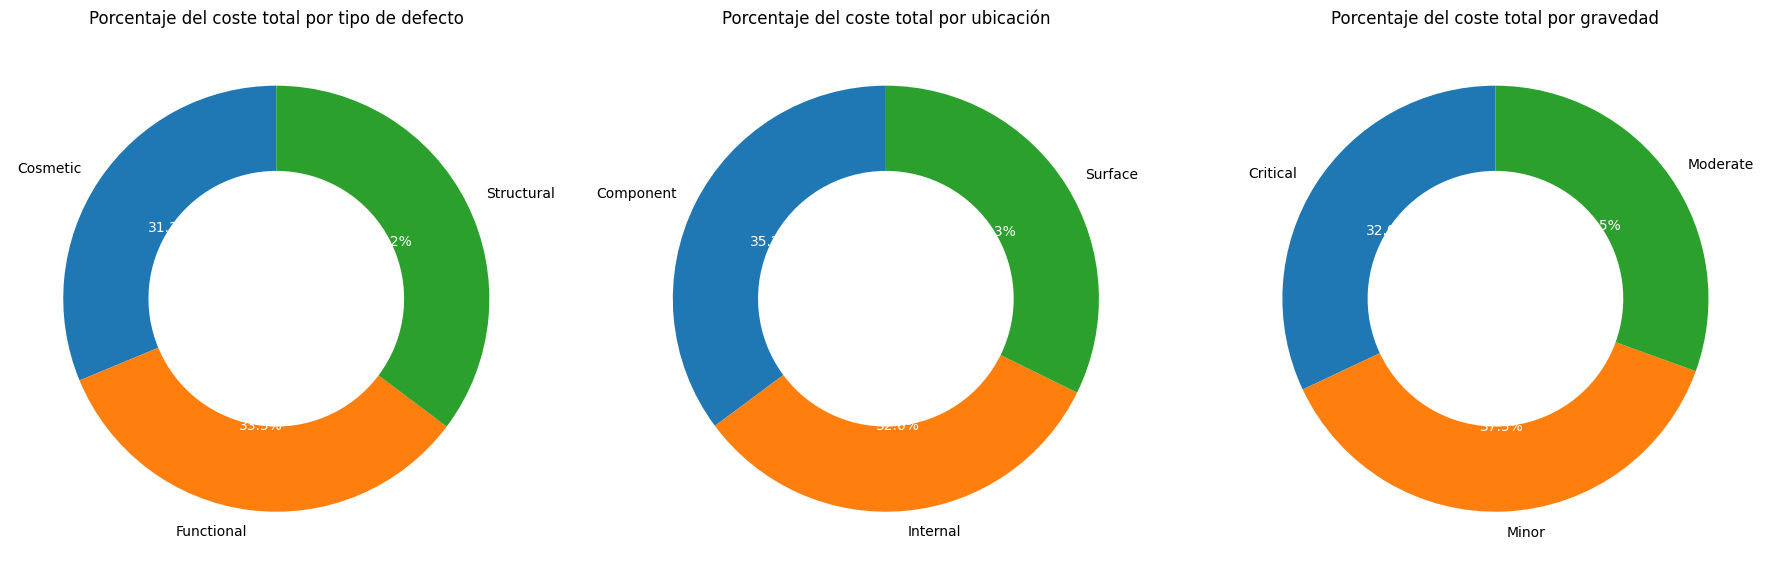

In [127]:
df=df_above_median

total_cost = df['repair_cost'].sum()

# Calcular los porcentajes para cada categoría
cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
cost_by_severity = df.groupby('severity')['repair_cost'].sum()

# Crear un subplot con tres gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Función para crear gráficos de donut
def plot_donut(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    for autotext in autotexts:
        autotext.set_color('white')
    ax.set_title(title)

# Gráfico 1: Porcentaje sobre el coste total por tipo de defecto
plot_donut(axes[0], cost_by_defect_type, cost_by_defect_type.index, 'Porcentaje del coste total por tipo de defecto')

# Gráfico 2: Porcentaje sobre el coste total por ubicación del defecto
plot_donut(axes[1], cost_by_defect_location, cost_by_defect_location.index, 'Porcentaje del coste total por ubicación')

# Gráfico 3: Porcentaje sobre el coste total por gravedad del defecto
plot_donut(axes[2], cost_by_severity, cost_by_severity.index, 'Porcentaje del coste total por gravedad')

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [4]:
# Contamos las incidencias por producto
product_incidents_count = df['product_id'].value_counts()

# Contamos las incidencias por semana (extraemos la semana de 'defect_date')
df['week'] = df['defect_date'].dt.to_period('W')
weekly_incidents = df['week'].value_counts().sort_index()

# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primer gráfico: número de incidencias por producto
product_incidents_count.plot(kind='bar', color='lightblue', ax=axes[0])
axes[0].set_title('Número de Incidencias por Producto')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Número de Incidencias')

# Segundo gráfico: incidencias por semana (gráfico de líneas)
weekly_incidents.plot(kind='line', marker='o', color='lightgreen', ax=axes[1])
axes[1].set_title('Número de Incidencias por Semana')
axes[1].set_xlabel('Semana')
axes[1].set_ylabel('Número de Incidencias')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values